In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/btc.csv', sep=';', dtype={'<OPEN>': float, '<HIGH>': float, '<LOW>': float, '<CLOSE>': float, '<VOL>': float})
df['<TICKER>'] = 'BTCUSD'
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d', )
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BTCUSD,D,2013-10-06,0,122.00000,122.00000,122.00,122.00,0.0
1,BTCUSD,D,2013-10-07,0,123.61000,123.61000,123.61,123.61,0.0
2,BTCUSD,D,2013-10-08,0,123.91000,124.19000,123.90,124.18,4.0
3,BTCUSD,D,2013-10-09,0,124.01687,124.01687,123.84,123.84,3.0
4,BTCUSD,D,2013-10-10,0,125.85000,125.86000,125.85,125.86,2.0


In [24]:
n = 50

df['MA'] = df['<CLOSE>'].rolling(window=n).mean()
df['STDMA'] = df['MA'].rolling(window=100).std()
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,MA,STDMA,EMA,STDEMA,EMA2,EMA3,TEMA
0,BTCUSD,D,2013-10-06,0,122.00000,122.00000,122.00,122.00,0.0,NaN,NaN,122.000000,NaN,1,1,1
1,BTCUSD,D,2013-10-07,0,123.61000,123.61000,123.61,123.61,0.0,NaN,NaN,122.063137,NaN,1,1,1
2,BTCUSD,D,2013-10-08,0,123.91000,124.19000,123.90,124.18,4.0,NaN,NaN,122.146151,NaN,1,1,1
3,BTCUSD,D,2013-10-09,0,124.01687,124.01687,123.84,123.84,3.0,NaN,NaN,122.212577,NaN,1,1,1
4,BTCUSD,D,2013-10-10,0,125.85000,125.86000,125.85,125.86,2.0,NaN,NaN,122.355613,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,BTCUSD,D,2023-08-30,0,27731.70000,27757.30000,27005.20,27305.40,2028.0,28676.832,924.635110,28062.205585,911.083976,1,1,1
3604,BTCUSD,D,2023-08-31,0,27305.40000,27605.50000,25663.00,25936.20,2370.0,28587.650,924.579399,27978.832816,908.211215,1,1,1
3605,BTCUSD,D,2023-09-01,0,25936.30000,26127.00000,25333.30,25808.30,2543.0,28474.096,924.381979,27893.713883,905.255469,1,1,1
3606,BTCUSD,D,2023-09-02,0,25808.30000,25973.80000,25754.10,25869.70,614.0,28384.896,924.152163,27814.340789,902.320464,1,1,1


In [35]:
def plot_interval(df, start, end, measure, dev):
    tmp = df[
        (df['<DATE>'] > start)
        & (df['<DATE>'] < end)
    ]

    plt.plot(tmp['<CLOSE>'])
    plt.plot(tmp[measure], c='y')
    plt.plot(tmp[measure] + tmp[dev], c='r')
    plt.plot(tmp[measure] - tmp[dev], c='g')
    plt.legend(['PRICE', measure, 'SELL', 'BUY'])
    plt.title(f"{start} -> {end}")

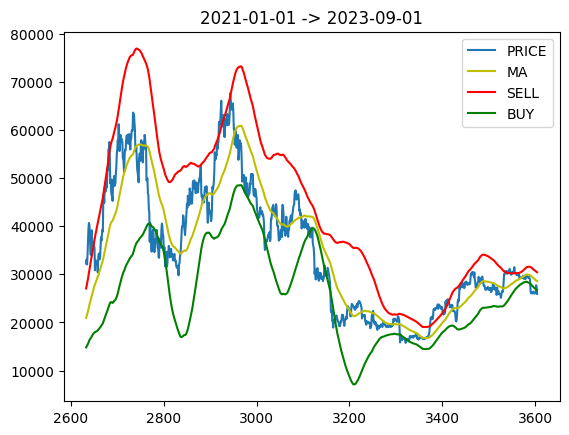

In [20]:
plot_interval(df, '2021-01-01', '2023-09-01', 'MA', 'STDMA')

In [22]:
def calc_ema(df, date, price, n, ema='EMA'):
    df[ema] = 1
    df.loc[0, ema] = df.loc[0, price]

    for i, day in enumerate(df[date]):
        if i == 0:
            continue
        else:
            last_price = df.loc[i, price]
            prev_ema = df.loc[i - 1, ema]
            alpha = 2/(n + 1)
            df.loc[i, ema] = (last_price - prev_ema) * alpha + prev_ema

    return df[ema]

In [33]:
n = 100

df['EMA'] = calc_ema(df, '<DATE>', '<CLOSE>', n)
df['STDEMA'] = df['EMA'].rolling(n).std()

df['EMA2'] = calc_ema(df, '<DATE>', 'EMA', n, 'EMA2')
df['EMA3'] = calc_ema(df, '<DATE>', 'EMA2', n, 'EMA3')

df['TEMA'] = 3 * (df['EMA'] - df['EMA2']) + df['EMA3']
df['STDTEMA'] = df['TEMA'].rolling(n).std()

df.head()

/var/folders/8b/tjd_lchd7bv4vf5s4r_9rvj40000gn/T/ipykernel_99817/510473459.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '122.03188118811882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, ema] = (last_price - prev_ema) * alpha + prev_ema
/var/folders/8b/tjd_lchd7bv4vf5s4r_9rvj40000gn/T/ipykernel_99817/510473459.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '122.00063131065582' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, ema] = (last_price - prev_ema) * alpha + prev_ema
/var/folders/8b/tjd_lchd7bv4vf5s4r_9rvj40000gn/T/ipykernel_99817/510473459.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '122.0000125012011' has dtype incompatible with int64, please e

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,MA,STDMA,EMA,STDEMA,EMA2,EMA3,TEMA,STDTEMA
0,BTCUSD,D,2013-10-06,0,122.00000,122.00000,122.00,122.00,0.0,NaN,NaN,122.000000,NaN,122.000000,122.000000,122.000000,NaN
1,BTCUSD,D,2013-10-07,0,123.61000,123.61000,123.61,123.61,0.0,NaN,NaN,122.031881,NaN,122.000631,122.000013,122.093762,NaN
2,BTCUSD,D,2013-10-08,0,123.91000,124.19000,123.90,124.18,4.0,NaN,NaN,122.074418,NaN,122.002092,122.000054,122.217031,NaN
3,BTCUSD,D,2013-10-09,0,124.01687,124.01687,123.84,123.84,3.0,NaN,NaN,122.109380,NaN,122.004217,122.000136,122.315626,NaN
4,BTCUSD,D,2013-10-10,0,125.85000,125.86000,125.85,125.86,2.0,NaN,NaN,122.183650,NaN,122.007770,122.000287,122.527927,NaN


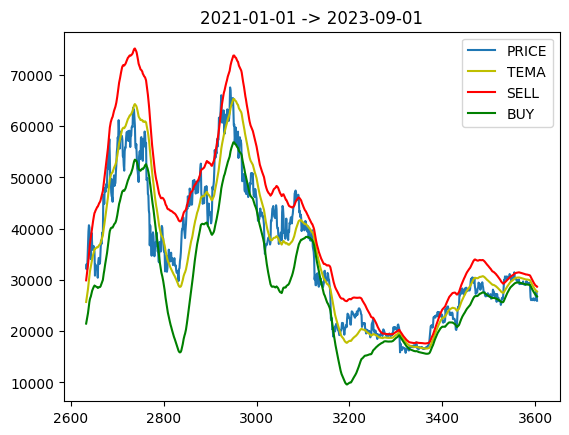

In [36]:
plot_interval(df, '2021-01-01', '2023-09-01', 'TEMA', 'STDTEMA')

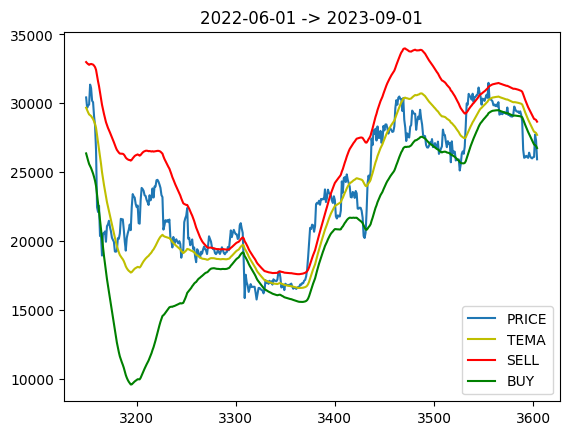

In [38]:
plot_interval(df, '2022-06-01', '2023-09-01', 'TEMA', 'STDTEMA')